In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.tree import DecisionTreeClassifier
import imblearn
from imblearn.over_sampling import SMOTE 
import re
import pickle
import matplotlib.pyplot as plt
import nltk 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer




In [ ]:
df=pd.read_csv('/content/spam.csv',encoding="latin")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:

df.rename({"v1":"label","v2":"text"},inplace=True,axis=1)

In [ ]:
df

,label,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [ ]:
X = df['text']
y = df['label']

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
X_transformed = vectorizer.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

In [ ]:
print("Before oversampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before oversampling, count of label '0': {}".format(sum(y_train == 0)))

Before oversampling, count of label '1': 597
Before oversampling, count of label '0': 3860


In [ ]:
smote = SMOTE(random_state=42)

In [ ]:
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
print("After oversampling, count of label '1': {}".format(sum(y_resampled == 1)))
print("After oversampling, count of label '0': {}".format(sum(y_resampled == 0)))

After oversampling, count of label '1': 3860
After oversampling, count of label '0': 3860


In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
corpus=[]
length=len(df)

In [ ]:
for i in range(0, len(df)):
    text = re.sub('[^a-zA-Z0-9]', ' ', df['text'][i])
    text = text.lower()
    text = text.split()
    ps = PorterStemmer()
    stop_words = set(stopwords.words('english'))
    text = [ps.stem(word) for word in text if not word in stop_words]
    text = ' '.join(text)
    corpus.append(text)

In [ ]:
corpus


['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send 1 50 rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'winner valu network custom select receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash 100 20 000 pound txt csh11 send 87575 cost 150p day 6day 16 tsandc appli repli hl 4 info',
 'urgent 1 week free mem

In [ ]:
cv=CountVectorizer(max_features=35000)
X=cv.fit_transform(corpus).toarray()

In [ ]:
pickle.dump(cv, open('cv1.pkl','wb')) 

In [ ]:
df.describe()

,label
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
df.shape
(5572,5)

(5572, 5)

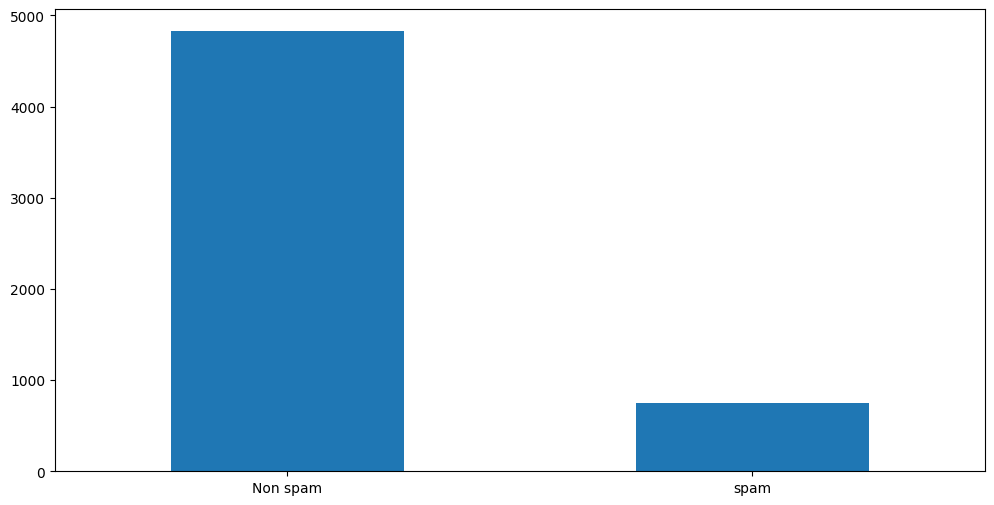

In [ ]:
df["label"].value_counts().plot(kind="bar",figsize=(12,6))
plt.xticks(np.arange(2),('Non spam','spam'),rotation=0);

In [ ]:
X_bal = [[1, 2], [3, 4], [5, 6]]
names = ['label', 'text']

In [ ]:
sc=StandardScaler()
X_bal_scaled = sc.fit_transform(X_bal)

In [ ]:
print(X_bal_scaled)

[[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]


In [ ]:
X_bal_df = pd.DataFrame(X_bal_scaled, columns=names)
print(X_bal_df)

      label      text
0 -1.224745 -1.224745
1  0.000000  0.000000
2  1.224745  1.224745


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create a decision tree classifier and fit it to the training data
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Evaluate the accuracy of the model on the testing data
accuracy = clf.score(X_test, y_test)
print('Decision tree accuracy:', accuracy)


Decision tree accuracy: 0.9730861244019139


In [ ]:
# Create a random forest classifier and fit it to the training data
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Evaluate the accuracy of the model on the testing data
accuracy = rf.score(X_test, y_test)
print('Random forest accuracy:', accuracy)


Random forest accuracy: 0.9748803827751196


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

# Evaluate the accuracy of the model on the testing data
accuracy = nb.score(X_test, y_test)
print('Naive Bayes accuracy:', accuracy)

Naive Bayes accuracy: 0.8744019138755981


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
# Create an ANN model with one hidden layer and an output layer
model = Sequential()
model.add(Dense(10, input_dim=X.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Evaluate the accuracy of the model on the testing data
accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
print('ANN accuracy:', accuracy)


ANN accuracy: 0.9838516712188721


In [ ]:
y_pred=model.predict(X_test)
y_pred

53/53 [==============================] - 0s 5ms/step


array([[2.8423732e-04],
       [1.2185011e-04],
       [1.4719578e-04],
       ...,
       [1.6918497e-01],
       [5.8668803e-07],
       [2.6230691e-07]], dtype=float32)

In [ ]:
y_pr=np.where(y_pred>0.5,1,0)
y_test

1078    0
4028    0
958     0
4642    0
4674    1
       ..
3954    0
619     0
1987    0
2358    0
3594    0
Name: label, Length: 1672, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score



# Compute the confusion matrix and accuracy score
cm = confusion_matrix(y_test, y_pr)
score = accuracy_score(y_test, y_pr)

print('Confusion Matrix:')
print(cm)
print('Accuracy Score Is: ', score*100, '%')


Confusion Matrix:
[[1454    0]
 [  27  191]]
Accuracy Score Is:  98.38516746411483 %


In [ ]:
import pickle

def new_review(new_review_text):
    # Load the trained CountVectorizer from the saved file
    with open('/content/cv1.pkl', 'rb') as file:
        cv = pickle.load(file)

    # Preprocess the new review text
    new_review = cv.transform([new_review_text]).toarray()

    # Load the trained model from the saved file
    with open('/content/model.pkl', 'rb') as file:
        model = pickle.load(file)

    # Make a prediction on the new review text
    prediction = model.predict(new_review)

    # Return the predicted sentiment value
    return prediction[0]


In [ ]:
import re
import numpy as np
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

def new_review(new_review):
  new_review=new_review
  new_review = re.sub('[a-zA-Z]',' ',new_review)
  new_review = new_review.lower()
  new_review = new_review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
  new_review = ' '.join(new_review)
  new_corpus = [new_review]
  new_X_test = cv.transform(new_corpus).toarray()
  print(new_X_test)
  new_y_pred = model.predict(new_X_test)
  print(new_y_pred)
  new_X_pred = np.where(new_y_pred>0.5,1,0)
  return new_y_pred


In [ ]:
new_review=new_review(str(input("Enter new review...")))

Enter new review...hello fg hou hkl
[[0 0 0 ... 0 0 0]]
1/1 [==============================] - 0s 25ms/step
[[0.00241451]]


In [ ]:
y_pred_binary = np.where(y_pred > 0.5, 1, 0)
cm = confusion_matrix(y_test, y_pred_binary)
score = accuracy_score(y_test, y_pred_binary)
print(cm)
print('accuracy score for naive bayes:', score * 100)


[[1454    0]
 [  27  191]]
accuracy score for naive bayes: 98.38516746411483


In [ ]:
y_pred_binary = np.where(y_pred > 0.5, 1, 0)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred_binary)
score = accuracy_score(y_test, y_pred_binary)
print(cm)
print('accuracy score:', score * 100)
print('========================================')
cm1 = confusion_matrix(y_test, y_pred_binary)
score1 = accuracy_score(y_test, y_pred_binary)
print(cm1)
print('accuracy score is:', score1 * 100)



[[1454    0]
 [  27  191]]
accuracy score: 98.38516746411483
[[1454    0]
 [  27  191]]
accuracy score is: 98.38516746411483


In [ ]:
y_pred= np.where(y_pred > 0.5, 1, 0)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
score=accuracy_score(y_test,y_pred)
print(cm)
print('accuracy score is:-',score*100)


[[1454    0]
 [  27  191]]
accuracy score is:- 98.38516746411483


In [ ]:
cm=confusion_matrix(y_test,y_pred)
score=accuracy_score(y_test,y_pred)
print(cm)
print('Accuracy Score Is:-',score*100)

[[1454    0]
 [  27  191]]
Accuracy Score Is:- 98.38516746411483


In [ ]:
pickle.dump(cv,open('spam.pkl','wb'))

In [ ]:
model.save('spam.h5')